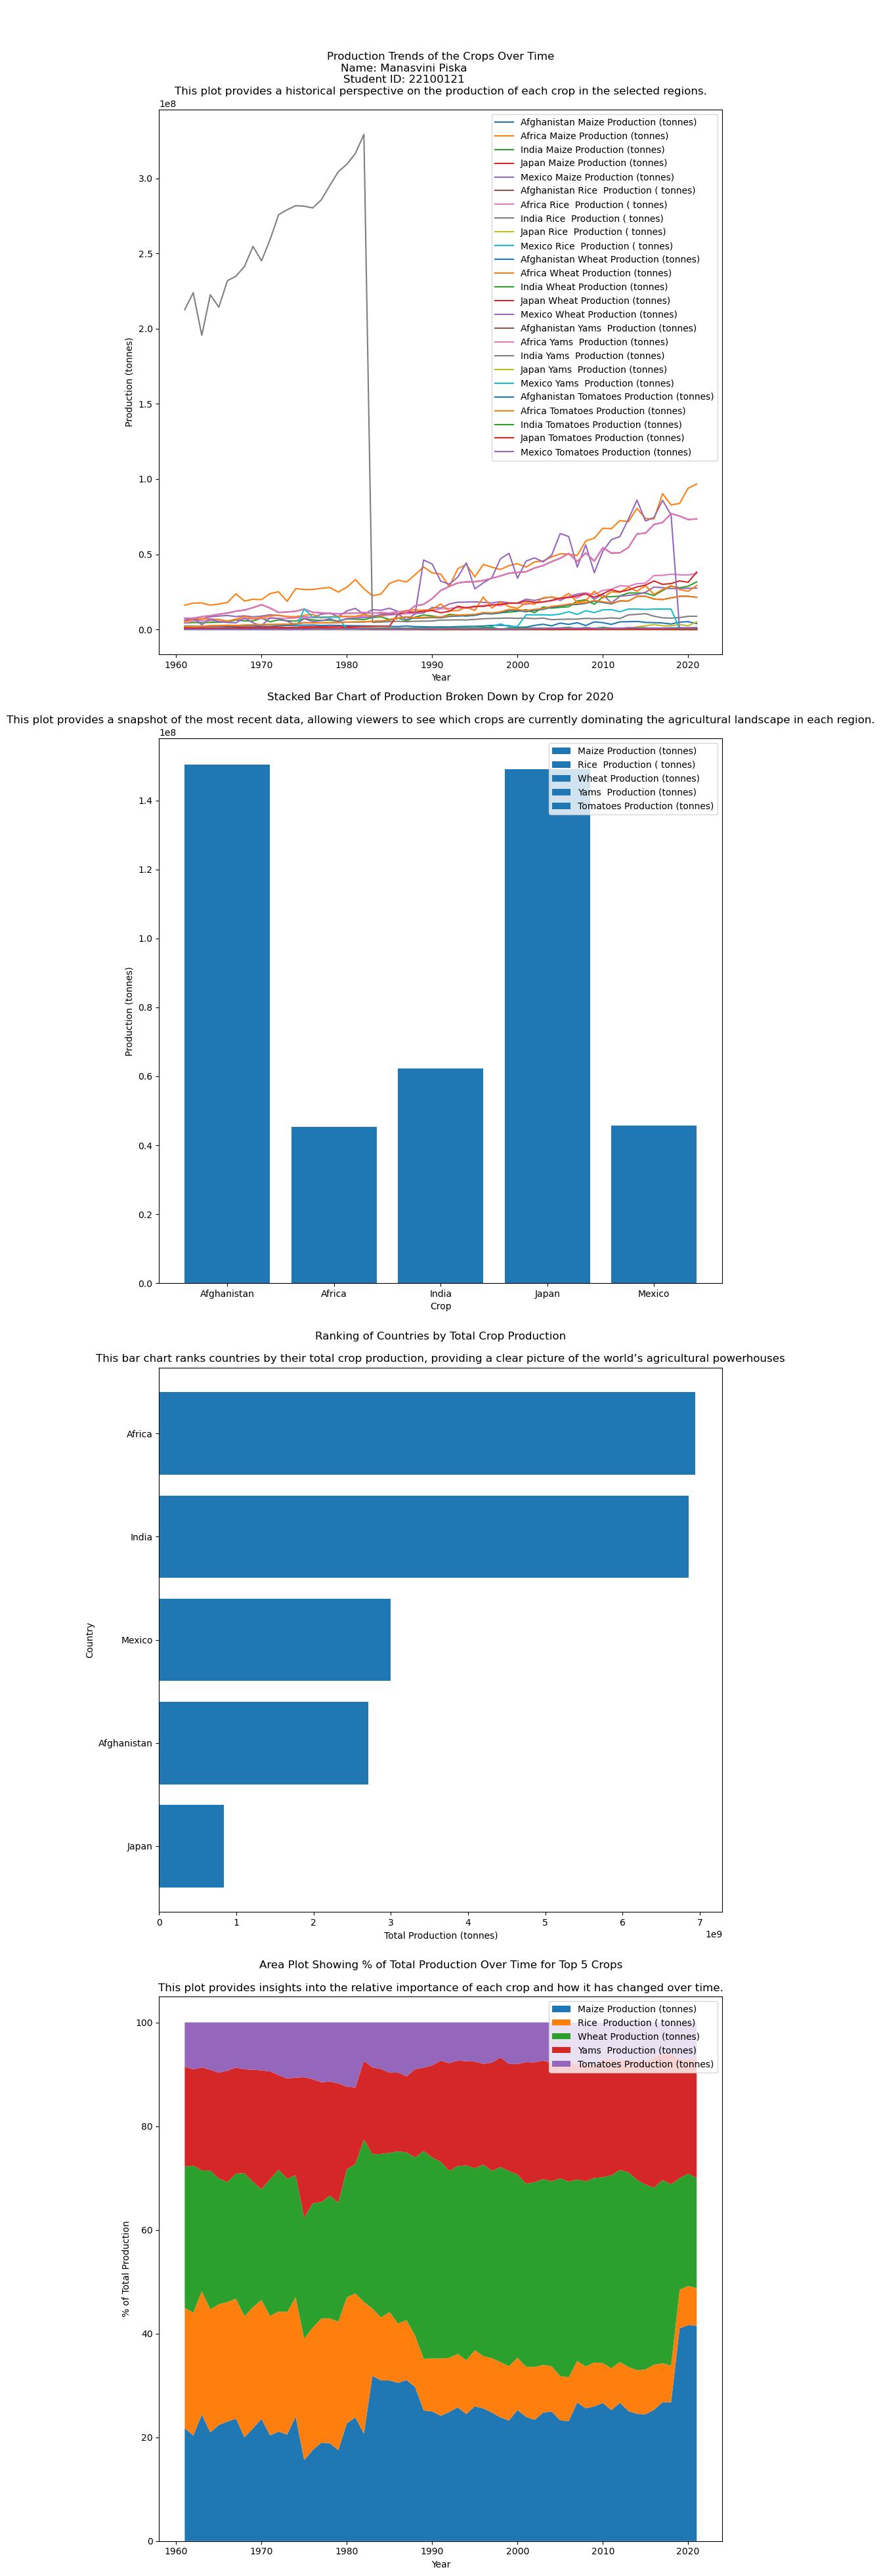

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
crop = pd.read_csv('worldFoodProduction.csv')

# List of countries I am are interested in
countries = ['Afghanistan', 'Africa', 'India', 'Japan', 'Mexico']

# Filtered the data for the selected countries
filtered_data = crop[crop['Entity'].isin(countries)]

# List of crops I am  are interested in
crops = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Wheat Production (tonnes)', 'Yams  Production (tonnes)', 'Tomatoes Production (tonnes)']

fig, axs = plt.subplots(4, 1, figsize=(10, 40))  # Create 4 subplots

# Adding the title and student details
fig.suptitle('Agricultural Trends: A Deep Dive into Crop Production',fontsize=16)
fig.suptitle('\n\n\n\n\nName: Manasvini Piska\nStudent ID: 22100121',fontsize= 12)
# Plotting the production trends of the crops over time
for i, crop_type in enumerate(crops):
    for country in countries:
        country_crop_data = filtered_data[(filtered_data['Entity'] == country) & (filtered_data[crop_type].notna())]
        axs[0].plot(country_crop_data['Year'], country_crop_data[crop_type], label=f'{country} {crop_type}')
axs[0].set_title('Production Trends of the Crops Over Time\n\n\nThis plot provides a historical perspective on the production of each crop in the selected regions.')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Production (tonnes)')
axs[0].legend()

# Created a stacked bar chart of production broken down by crop for a given year
year = 2020
year_data = filtered_data[filtered_data['Year'] == year]
bar_data = [year_data[crop_type].sum() for crop_type in crops]
axs[1].bar(countries, bar_data, label=crops)
axs[1].set_title(f'Stacked Bar Chart of Production Broken Down by Crop for {year}\n\nThis plot provides a snapshot of the most recent data, allowing viewers to see which crops are currently dominating the agricultural landscape in each region.')
axs[1].set_xlabel('Crop')
axs[1].set_ylabel('Production (tonnes)')
axs[1].legend()

# Rank countries by crop production using horizontal bar charts
total_production_by_country = filtered_data.groupby('Entity')[crops].sum()
total_production_by_country['Total Production'] = total_production_by_country.sum(axis=1)
total_production_by_country = total_production_by_country.sort_values('Total Production')
axs[2].barh(total_production_by_country.index, total_production_by_country['Total Production'])
axs[2].set_title('Ranking of Countries by Total Crop Production\n\nThis bar chart ranks countries by their total crop production, providing a clear picture of the world’s agricultural powerhouses')
axs[2].set_xlabel('Total Production (tonnes)')
axs[2].set_ylabel('Country')

# Createing an area plot showing % of total production over time for top 5 crops
total_production = filtered_data[crops].sum(axis=1)
percentage_data = filtered_data[crops].div(total_production, axis=0) * 100
percentage_data['Year'] = filtered_data['Year']
percentage_data = percentage_data.groupby('Year').mean()
axs[3].stackplot(percentage_data.index, percentage_data[crops].T, labels=crops)
axs[3].set_title('Area Plot Showing % of Total Production Over Time for Top 5 Crops\n\nThis plot provides insights into the relative importance of each crop and how it has changed over time.')
axs[3].set_xlabel('Year')
axs[3].set_ylabel('% of Total Production')
axs[3].legend()

plt.tight_layout()
plt.savefig("22100121.png", dpi=300)
